# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

(b) Line plots from multiple columns with a legend

(c) Compute growth rates for a time series

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

(e) Compute aggregate dataset by time period

(f) Convert a dataset to long format


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime
financial = pd.read_csv("data_raw/financial.csv")


In [3]:
#A: parse data using wildcards
#to date/time
financial["date"] = pd.to_datetime(financial["date_str"])
#string of time
message_monthname =  financial["date"].dt.strftime("This is the month of %B")
date1 = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
#period grouping
financial["week"] = financial["date"].dt.to_period(freq = "w")
#aggregating
weeklydata = (financial
              .groupby("date") 
              .agg( sp500_mean = ("sp500","mean")))




$\quad$ <img src="figures/wildcards_fig1.png" alt="drawing" width="300"/>

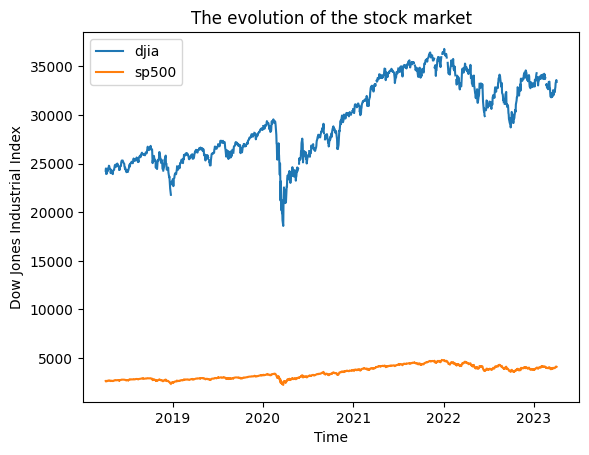

In [6]:
#B: line plots with multiple columns and legend
plt.plot("date", "djia", data = financial)
plt.xlabel("Time")
plt.ylabel("Dow Jones Industrial Index")
plt.title("The evolution of the stock market")
plt.plot("date", "sp500", data = financial)
plt.legend()


,sp500,diff_sp500,lag_sp500,growth_sp500
0,2644.69,NaN,NaN,NaN
1,2662.84,18.15,2644.69,0.686281
2,2604.47,-58.37,2662.84,-2.192021
3,2613.16,8.69,2604.47,0.333657
4,2656.87,43.71,2613.16,1.672687
...,...,...,...,...
1300,4027.81,56.54,3971.27,1.423726
1301,4050.83,23.02,4027.81,0.571526
1302,4109.31,58.48,4050.83,1.443655
1303,4124.51,15.20,4109.31,0.369892


Text(0.5, 1.0, 'Change in the S&P 500 Index')

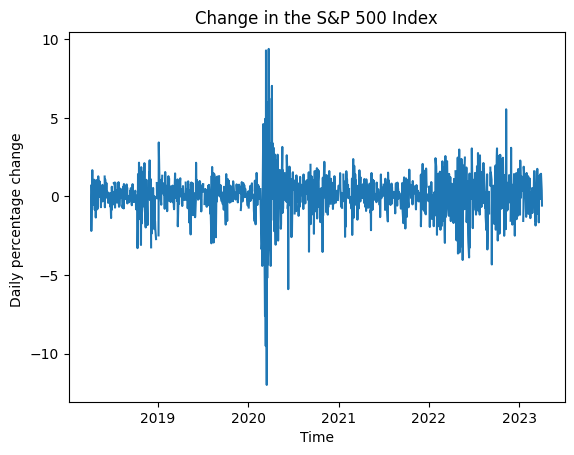

In [8]:
#Compute growth rates for a time series
financial["diff_sp500"] = financial["sp500"].diff()

financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]
financial["diff_date"]  = financial["date"]-financial["date"].shift(1)


financial["count_days"] = financial["diff_date"].dt.days

display(financial[["sp500", "diff_sp500", "lag_sp500", "growth_sp500"]])

#plot
plt.plot("date", "growth_sp500",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 Index")

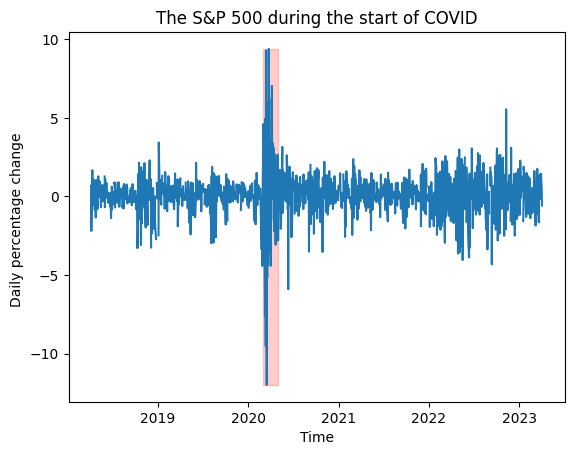

In [13]:
#D: flag a subset of the data and produce a shaded plot

#first, define the period you want to flag
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5

#plot
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

In [11]:
#E: Compute aggregate dataset by time period
financial["week"] = financial["date"].dt.to_period(freq = "w")
weeklydata = (financial
              .groupby("week") 
              .agg( sp500_mean = ("sp500","mean")))
weeklydata

,sp500_mean
week,
2018-04-02/2018-04-08,2637.333333
2018-04-09/2018-04-15,2646.502000
2018-04-16/2018-04-22,2691.228000
2018-04-23/2018-04-29,2656.220000
2018-04-30/2018-05-06,2646.334000
...,...
2023-03-06/2023-03-12,3961.342000
2023-03-13/2023-03-19,3908.780000
2023-03-20/2023-03-26,3962.224000


In [12]:
#F: convert dataset to long format
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])